In [1]:
%pylab inline
import sys
sys.path.append('../../MW-LMC-SCF/code')
sys.path.append('../scf_coefficients/')
import numpy as np
import matplotlib.pyplot as plt
#from read_coefficients import load_scf_coefficients
plt.style.use('~/Work/research/MW_viz/matplotlib.mplstyle')

Populating the interactive namespace from numpy and matplotlib


/home/ngc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import bfe

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import gala.potential as gp
import astropy.units as u
from matplotlib import colors
from astropy import coordinates

In [193]:
# Load Expansions 

def load_gc23_exp(mwlmc, n_init, n_final, host=False, sat=False,): 
    path_to_exp = "../../data/expansion/1e7/MWLMC6/"#.format(mwlmc)
    host_path = "BFE_MWLMC6_grav_MO3_simple_1e7_COM_n20_l20_host_snap_"
    sat_path = "BFE_MWLMC6_grav_MO3_simple_1e7_COM_n20_l20_sat_snap_"#.format(mwlmc)

    
    #host_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_host_snap_".format(mwlmc)
    #sat_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_sat_snap_".format(mwlmc)

    nsnaps = n_final - n_init
    
    coefficients = []
    exp_length = []
    exp_param = []
    com = []
    
    if host == True:
        host_coeff = np.zeros((nsnaps, 5, 21, 21, 21))
        host_rcom = np.zeros((nsnaps, 3))
        for i in range(n_init, n_final):
            print('snap {:03d}'.format(i))

            host_coeff[i-n_init], exp_host_length, exp_host_params, host_rcom[i-n_init] = bfe.ios.read_coefficients(path_to_exp
                                                                                                       + host_path
                                                                                                       + "{:03d}".format(i))
        coefficients.append(host_coeff)
        exp_length.append(exp_host_length)
        exp_param.append(exp_host_params)
        com.append(host_rcom)
        
    if sat == True:
        sat_coeff = np.zeros((nsnaps, 3, 21, 21, 21))
        sat_rcom = np.zeros((nsnaps, 3))
        
        for i in range(n_init, n_final):
            sat_coeff[i-n_init], exp_sat_length, exp_sat_params, sat_rcom[i-n_init] = bfe.ios.read_coefficients(path_to_exp
                                                                                                       + sat_path
                                                                                                       + "{:03d}".format(i))
        coefficients.append(sat_coeff)
        exp_length.append(exp_sat_length)
        exp_param.append(exp_sat_params)
        com.append(sat_rcom)
        
    
        
    return coefficients, exp_length, exp_param, com

In [194]:
mwlmc5_coeff, mwmlc5_exp_length, mwlmc5_exp_params, mwlmc5_rcom = load_gc23_exp('MWLMC5', 110, 111, host=True,
                                                                                sat=False)

snap 110
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients


In [195]:
mwlmc5_coeff[0][0][0].shape

(21, 21, 21)

In [196]:
#mwlmc5_coeff[0][0][0]

In [197]:
Shost = mwlmc5_coeff[0][0][0]
Thost = mwlmc5_coeff[0][0][1]

In [198]:
Shost_mon = np.zeros_like(Shost) 
Shost_mon[0,0,0] = Shost[0,0,0]

Thost_mon = np.zeros_like(Thost) 
Thost_mon[0,0,0] = Thost[0,0,0]

In [199]:
pot_all = gp.SCFPotential(m=1e10, r_s=40.85, Snlm=Shost, Tnlm=Thost)
pot_mon = gp.SCFPotential(m=1e10, r_s=40.85, Snlm=Shost_mon, Tnlm=Thost_mon)


In [200]:
ra = ['22:19:48', '22:52:12', '23:55:48', '00:28:12']
dec = ['00:00:00', '-00:00:00', '-00:00:00', '00:00:00']
distances = np.linspace(20, 100, 1000)

def galactocentric_profiles(distance, ra, dec):
    coords_obs = coordinates.SkyCoord(ra=ra, dec=dec, distance=distance, 
                                      frame='icrs', unit=(u.hourangle, u.hourangle, u.kpc))
    return np.array([coords_obs.galactocentric.x.value, 
                     coords_obs.galactocentric.y.value, 
                     coords_obs.galactocentric.z.value])

In [201]:
coords_obs = coordinates.SkyCoord(ra=ra, dec=dec, frame='icrs', unit=u.hourangle)

In [202]:
ltiles = coords_obs.galactic.l
btiles = coords_obs.galactic.b

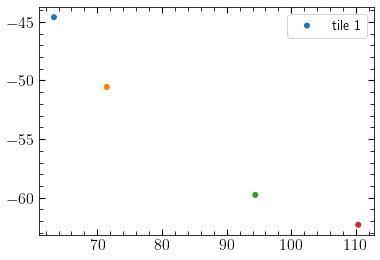

In [203]:
plt.scatter(ltiles, btiles, c=['C0', 'C1', 'C2', 'C3'], label='tile\ 1')
plt.legend(fontsize=14)

In [204]:
xyz_tile4 = galactocentric_profiles(distances, ra[0], dec[0])
xyz_tile3 = galactocentric_profiles(distances, ra[1], dec[1])
xyz_tile2 = galactocentric_profiles(distances, ra[2], dec[2])
xyz_tile1 = galactocentric_profiles(distances, ra[3], dec[3])


In [205]:
xyz_tile1.shape

(3, 1000)

In [239]:
y = np.linspace(-150, 150, 100)
z = np.linspace(-150, 150, 100)
x = np.linspace(-20, 20, 40)
ygrid, zgrid = np.meshgrid(y, z)

In [240]:
dens_mean = np.zeros((40, 100, 100))
mon_dens = np.zeros((40, 100, 100))

for i in range(len(x)):
    dens_mean[i] = pot_all.density(np.array([np.zeros(100**2)+x[i], ygrid.flatten(), zgrid.flatten()])).reshape(100,100)
    mon_dens[i] = pot_mon.density(np.array([np.zeros(100**2)+x[i], ygrid.flatten(), zgrid.flatten()])).reshape(100,100)

In [358]:
LMC_orbit = np.loadtxt('../../../Cranes/data/orbits/LMC5_orbit_sat_interp_b1.txt')

In [359]:
LMC_orbit.shape

(396, 6)

/tmp/ipykernel_416368/3754337482.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


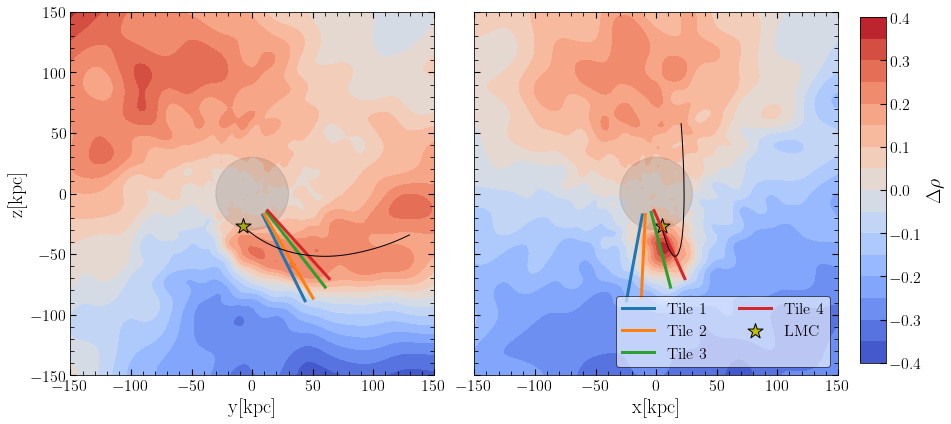

In [374]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
im = ax[0].contourf(ygrid, zgrid,
             np.mean((dens_mean/mon_dens), axis=0) - 1, levels=15,
             cmap='coolwarm')

#cbar = plt.colorbar(im)
#cbar.set_label(r'$\rm{\Delta \rho}$')
ax[0].plot(xyz_tile1[1], xyz_tile1[2], label=r'$\rm{Tile\ 1}$')
ax[0].plot(xyz_tile2[1], xyz_tile2[2], label=r'$\rm{Tile\ 2}$')
ax[0].plot(xyz_tile3[1], xyz_tile3[2], label=r'$\rm{Tile\ 3}$')
ax[0].plot(xyz_tile4[1], xyz_tile4[2], label=r'$\rm{Tile\ 4}$')
#ax[0].legend(fontsize=16, ncols=2, loc='lower right', framealpha=0.6, edgecolor='k')
ax[0].set_xlabel(r'$\rm{y[kpc]}$')
ax[0].set_ylabel(r'$\rm{z[kpc]}$')
ax[0].plot(LMC_orbit[84:111,1], LMC_orbit[84:111,2], c='k', lw=1)
ax[0].scatter(LMC_orbit[111,1], LMC_orbit[111,2], c='y', marker='*', s=250, edgecolor='k')

circ = plt.Circle((0,0), 30, color='k', alpha=0.1)
ax[0].add_patch(circ)


im2 = ax[1].contourf(ygrid, zgrid,
             np.mean((dens_mean2/mon_dens2), axis=0) - 1, levels=15,
             cmap='coolwarm')

#fig.colorbar(im2, ax=ax[1])

cbar_ax = fig.add_axes([1.0, 0.15, 0.03, 0.8])
cbar2 = fig.colorbar(im2, cax=cbar_ax)
cbar2.set_label(r'$\rm{\Delta \rho}$')

ax[1].plot(xyz_tile1[0], xyz_tile1[2], label=r'$\rm{Tile\ 1}$')
ax[1].plot(xyz_tile2[0], xyz_tile2[2], label=r'$\rm{Tile\ 2}$')
ax[1].plot(xyz_tile3[0], xyz_tile3[2], label=r'$\rm{Tile\ 3}$')
ax[1].plot(xyz_tile4[0], xyz_tile4[2], label=r'$\rm{Tile\ 4}$')
ax[1].plot(LMC_orbit[40:111,0], LMC_orbit[40:111,2], c='k', lw=1)
ax[1].scatter(LMC_orbit[111,0], LMC_orbit[111,2], c='y', marker='*', s=250, label=r'$\rm{LMC}$', edgecolor='k')

ax[1].legend(fontsize=16, ncols=2, loc='lower right', framealpha=0.6, edgecolor='k')
ax[1].set_xlabel(r'$\rm{x[kpc]}$')

circ = plt.Circle((0,0), 30, color='k', alpha=0.1)
ax[1].add_patch(circ)

plt.tight_layout()

plt.savefig('wake_DECAM_tiles_projections.pdf', bbox_inches='tight')

In [371]:
plt.scatter?

In [273]:
x2 = np.linspace(-150, 150, 100)
z2 = np.linspace(-150, 150, 100)
y2 = np.linspace(-20, 20, 10)
xgrid2, zgrid2 = np.meshgrid(x2, z2)

In [274]:
dens_mean2 = np.zeros((10, 100, 100))
mon_dens2 = np.zeros((10, 100, 100))

for i in range(len(y2)):
    dens_mean2[i] = pot_all.density(np.array([xgrid2.flatten(), np.zeros(100**2)+y2[i], zgrid2.flatten()])).reshape(100,100)
    mon_dens2[i] = pot_mon.density(np.array([xgrid2.flatten(), np.zeros(100**2)+y2[i], zgrid2.flatten()])).reshape(100,100)

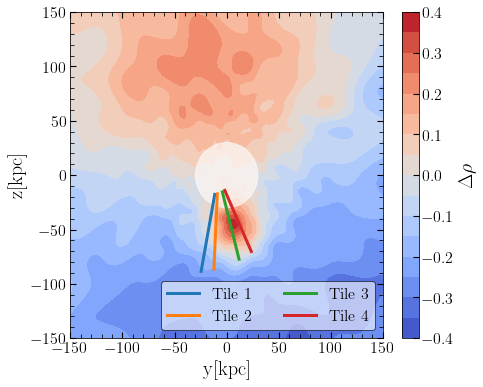

In [235]:
plt.legend?

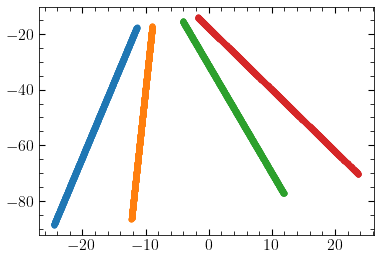

In [242]:
plt.scatter(xyz_tile1[0], xyz_tile1[2])
plt.scatter(xyz_tile2[0], xyz_tile2[2])
plt.scatter(xyz_tile3[0], xyz_tile3[2])
plt.scatter(xyz_tile4[0], xyz_tile4[2])

In [244]:
dens_tile1 = pot_all.density(xyz_tile1)
dens_tile2 = pot_all.density(xyz_tile2)
dens_tile3 = pot_all.density(xyz_tile3)
dens_tile4 = pot_all.density(xyz_tile4)

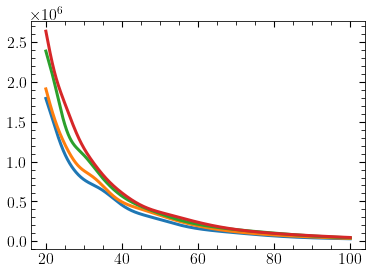

In [248]:
plt.plot(distances, dens_tile1)
plt.plot(distances, dens_tile2)
plt.plot(distances, dens_tile3)
plt.plot(distances, dens_tile4)

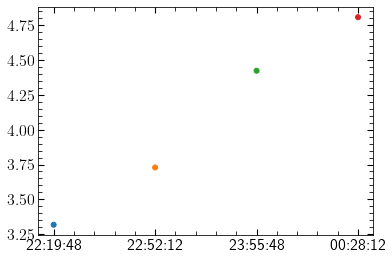

In [289]:
sum_tiles = np.array([np.sum(dens_tile1), np.sum(dens_tile2), np.sum(dens_tile3), np.sum(dens_tile4)])
plt.scatter(ra, sum_tiles/1e8, c=['C0', 'C1', 'C2', 'C3'])

Text(0, 0.5, '$\\Delta \\rho$')

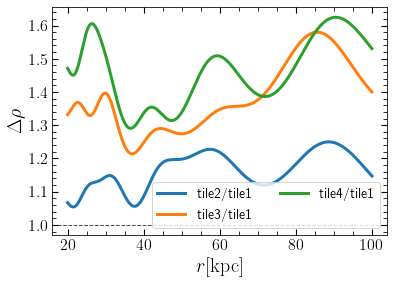

In [288]:
plt.plot(distances, dens_tile2/dens_tile1, label='tile2/tile1')
plt.plot(distances, dens_tile3/dens_tile1, label='tile3/tile1')
plt.plot(distances, dens_tile4/dens_tile1, label='tile4/tile1')
plt.axhline(1, ls='--', c='k', alpha=0.7, lw=1)
plt.legend(fontsize=14, ncols=2)
plt.xlabel(r'$r\rm{[kpc]}$')
plt.ylabel(r'$\Delta \rho$')

In [215]:
np.savetxt('MWLMC6_tiles_density.txt', np.array([distances, dens_tile1, dens_tile2, dens_tile3, dens_tile4]).T)